## Anomaly Detection_Local Outlier Factor (LOF)

Density-based: The Local Outlier Factor is an algorithm to detect anomalies in observation data. Measuring the local density score of each sample and weighting their scores are the main concept of the algorithm. By comparing the score of the sample to its neighbors, the algorithm defines the lower density elements as anomalies in data.

   "The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers."
~ Wikipedia

Distance-based: Distance-based outlier detection method consults the neighbourhood of an object, which is defined by a given radius. An object is then considered an outlier if its neighborhood does not have enough other points.

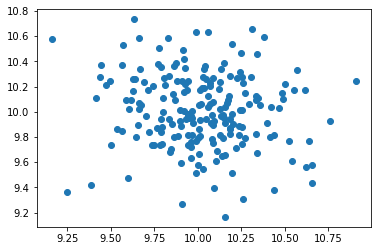

LocalOutlierFactor(contamination=0.03)


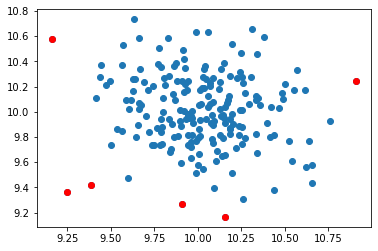

LocalOutlierFactor()
-1.819148296090704


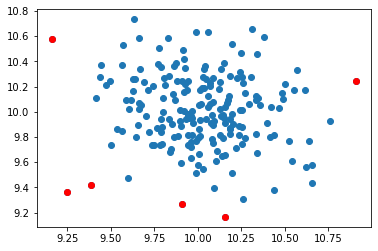

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

plt.scatter(x[:,0], x[:,1])
plt.show()

lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
print(lof)  
 
y_pred = lof.fit_predict(x)

lofs_index=where(y_pred==-1)
values = x[lofs_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

model = LocalOutlierFactor(n_neighbors=20) 
print(model)  
model.fit_predict(x) 
 
lof = model.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 
 
index = where(lof<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In this part, we use Height vs Weight dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

In [3]:
x=pd.read_csv('SOCR-HeightWeight.csv')
print(x)

       Height  Weight
0       61.93   78.01
1       61.91   78.57
2       66.57   82.38
3       63.13   83.09
4       65.47   83.34
...       ...     ...
24995   72.32  168.23
24996   73.52  168.88
24997   69.57  169.13
24998   74.30  170.55
24999   70.71  170.92

[25000 rows x 2 columns]


In [4]:
x=x[['Height','Weight']]

In [5]:
x= x.values

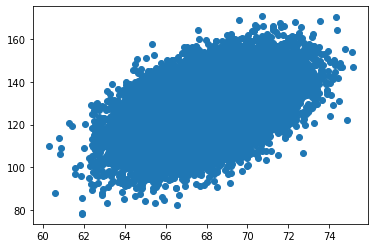

In [6]:
plt.scatter(x[:,0], x[:,1])
plt.show()

We'll define the model by using the LocalOutlierFactor class of Scikit-learn API. We'll set estimators number and contamination value in arguments. Contamination defines the proportion of outliers in a dataset.

In [7]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
print(lof)  
 
y_pred = lof.fit_predict(x)

LocalOutlierFactor(contamination=0.03)


We'll extract the negative outputs as the outliers.

In [8]:
lofs_index=where(y_pred==-1)
values = x[lofs_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.

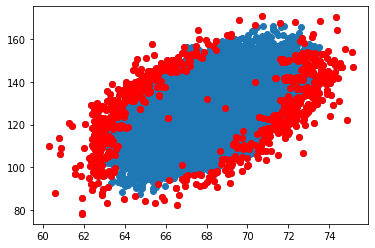

In [9]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In this part, we'll define the model without setting the contamination argument.

In [10]:
model = LocalOutlierFactor(n_neighbors=20) 

We'll fit the model with x dataset, then extract the samples score.

In [11]:
model.fit_predict(x) 
lof = model.negative_outlier_factor_

Next, we'll obtain the threshold value from the scores by using the quantile function. Here, we'll get the lowest 3 percent of score values as the anomalies.

In [12]:
thresh = quantile(lof, .03)
print(thresh) 

-1.1509501957405464


We'll extract the anomalies by comparing the threshold value and identify the values of elements.

In [13]:
index = where(lof<=thresh)
values = x[index]

Finally, we can visualize the results in a plot by highlighting the anomalies with a color.

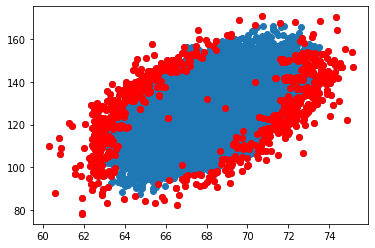

In [14]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

  In both methods above we've got the same result. You can use any of them in your analysis. The threshold or contamination value can be changed to filter out more extreme cases.

   In this tutorial, we've learned how to detect the anomalies with the Local Outlier Factor algorithm by using the Scikit-learn API class in Python. The full source code is listed below.